In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Linear Regression and Multiple Linear Regression

#### Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
X = df[["highway-mpg"]]
Y = df["price"]

In [63]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [65]:
lm.intercept_

38423.305858157386

In [66]:
lm.coef_

array([-821.73337832])

In [ ]:
## The ecuation:

# Price = 38423.30 - 821.73*highway-mpg
# Yhat = 38423.30 - 821.73*X

In [10]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
X1 = df[["engine-size"]]
Y1 = df["price"]

In [12]:
lm1.fit(X1,Y1)
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
Yhat1 = lm1.predict(X)
Yhat1[0:5]

array([-3458.11848261, -3458.11848261, -3624.9784983 , -2957.53843554,
       -4292.41856107])

In [14]:
lm1.intercept_

-7963.338906281049

In [15]:
lm1.coef_

array([166.86001569])

In [ ]:
# The ecuation:

# price = -7963.33 + 166.86*engine-size

#### Multiple Linear Regression

In [16]:
Z = df[["horsepower", "curb-weight", "engine-size","highway-mpg"]]

In [17]:
lm.fit(Z,df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lm.intercept_

-15806.624626329198

In [19]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [ ]:
# The ecuation:

# Price = -15806.62 + 53.485*horsepower + 4.70*curb-weight + 81.53*engine-size + 36.05*highway-mpg

In [20]:
lm2 = LinearRegression()
lm2.fit(df[["normalized-losses","highway-mpg"]], df["price"])
lm2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [22]:
lm2.intercept_

38201.31327245728

## 2. Model Evaluation using Visualization

In [23]:
import seaborn as sns
%matplotlib inline

#### Regression Plot

(0, 48168.419197967494)

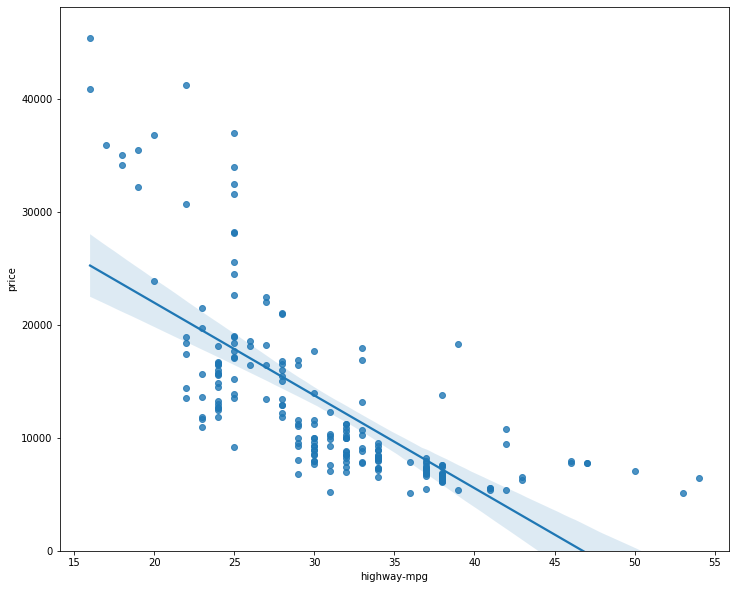

In [32]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x ="highway-mpg", y ="price", data=df)
plt.ylim(0,)

(0, 47414.10667770421)

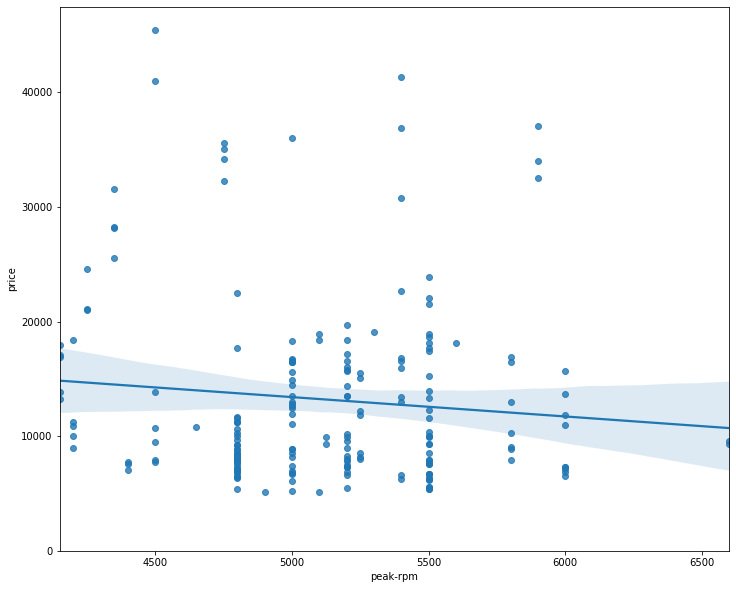

In [34]:
plt.figure(figsize=(width,height))
sns.regplot(x ="peak-rpm", y="price", data=df)
plt.ylim(0,)

#### Residual Plot

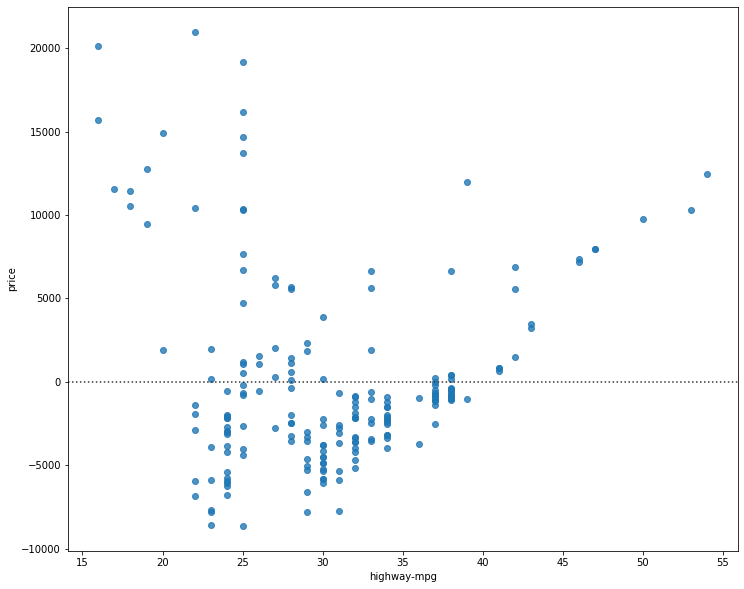

In [36]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(df["highway-mpg"],df["price"])
plt.show()

#### Multiple Linear Regression

In [38]:
Y_hat = lm.predict(Z)

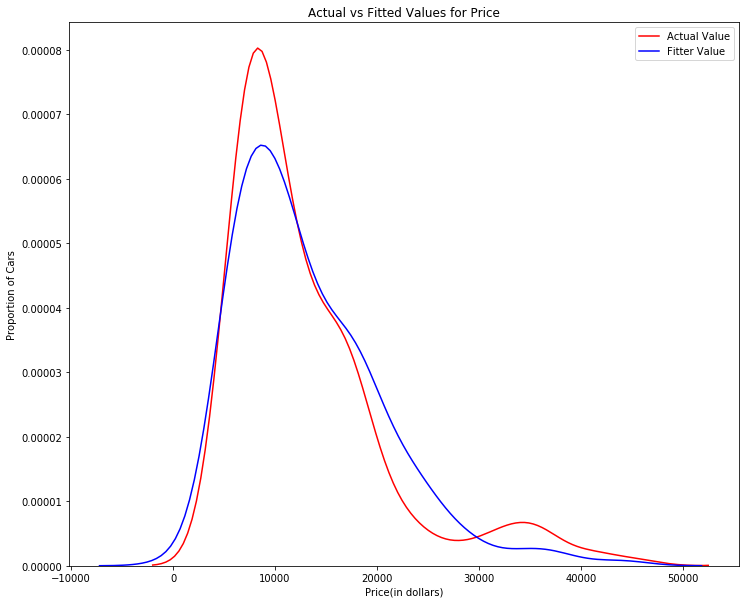

In [39]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df["price"], hist = False, color = "r",label = "Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitter Value", ax = ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price(in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

## 3. Polynomial Regression and Pipelines

#### Polynomial regression - 1 variable

In [46]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, ".",x_new,y_new,"-")
    plt.title("Polynomial Fit with Matplotlib for Price ~ Length")
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel("Price of Cars")
    
    plt.show()
    plt.close()

In [42]:
x = df["highway-mpg"]
y = df["price"]

In [44]:
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


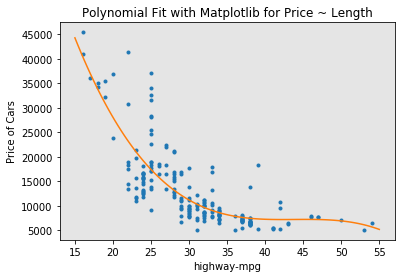

In [47]:
PlotPolly(p,x,y,"highway-mpg")

In [48]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

#### Multivariate Polynomial function ( Polynomial on multiple features/variables) 

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
pr = PolynomialFeatures(degree = 2)   # We create a PolynomialFeatures object of degree 2
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [51]:
Z_pr = pr.fit_transform(Z)

In [52]:
Z.shape   # The original data is of 201 samples and 4 features

(201, 4)

In [53]:
Z_pr.shape  # after the transformation, there 201 samples and 15 features

(201, 15)

#### Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [55]:
Input = [("scale", StandardScaler()),("polynomial", PolynomialFeatures(include_bias = False)),("model",LinearRegression())]

We input the list as an argument to the pipeline constructor

In [56]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

We can normalize the data, perform a transform and fit the model simultaneously.

In [57]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously

In [59]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

## 4. Measures for In-Sample Evaluation

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- R^2 / R-squared
- Mean Squared Error (MSE)

#### Model 1: Simple Linear Regression

In [67]:
lm.fit(X,Y)

print("The R-square is:", lm.score(X,Y))

The R-square is: 0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [68]:
Yhat = lm.predict(X)
print("The output of the first four predicted values is", Yhat[0:4])

The output of the first four predicted values is [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [69]:
from sklearn.metrics import mean_squared_error

We compare the predicted results with the actual results

In [70]:
mse = mean_squared_error(df["price"],Yhat)
print("The mean square error of price and predicted value is: ", mse)

The mean square error of price and predicted value is:  31635042.944639895


#### Model 2: Multiple Linear Regression

In [71]:
lm.fit(Z, df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
print("The R-square is: ", lm.score(Z, df["price"]))

The R-square is:  0.8093562806577457


We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [73]:
Y_predict_multifit = lm.predict(Z)

In [76]:
print("The mean square error of price and predicted value using multifit is: ",\
     mean_squared_error(df["price"], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


#### Model 3: Polynomial Fit

In [77]:
from sklearn.metrics import r2_score

In [78]:
r_squared = r2_score(y, p(x))

In [79]:
print("The R-square value is: ", r_squared)

The R-square value is:  0.6741946663906513


We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit

In [80]:
mean_squared_error(df["price"], p(x))

20474146.42636125

## 5. Prediction and Decision Making

#### Prediction

In [82]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [84]:
new_input = np.arange(1,100,1).reshape(-1,1)

In [85]:
lm.fit(X,Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
yhat = lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

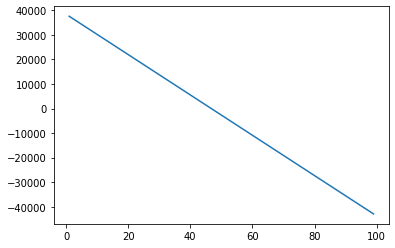

In [88]:
plt.plot(new_input, yhat)
plt.show()

#### Decision Making: Determining a Good Model Fit